# Produce the various exclusion plots

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import pickle
import gc

from exp_analysis_class import full_likelihood, compute_likelihood_from_retrieved
from dark_nus_utils import load_datasets
from const import alphaQED
from analyses_dict import analyses
from parameters_dict import *
from dark_nus_utils import retrieve_full_analysis

from likelihood_contours_plot import *

In [3]:
hierarchy = 'heavy'
D_or_M = 'dirac'

save_folder = f'../fig/6_limit_visualisation/'
!mkdir -p $save_folder

set_plot_style()

In [4]:
# my_exp_analyses = load_datasets(hierarchies=['heavy', 'light'],
#                                   D_or_Ms=D_or_M,
#                                   fluxes=['FHC', 'RHC'],
#                                 timeit=True, 
#                                 direct_load_objects=False,
#                                 load_grid=False,
#                                 dump=True,
#                                 nentries=1000000)

In [5]:
my_exp_analyses = load_datasets(
                                hierarchies=hierarchy, 
                                D_or_Ms=D_or_M, 
                                fluxes=['FHC', 'RHC'],
                                timeit=True, 
                                direct_load_objects=True,
                                load_grid=False,
                                dump=False,
                                nentries=1000000)

heavy dirac FHC
Wall time: 0.7345097064971924 s, CPU time: 0.7209796420000005
heavy dirac RHC
Wall time: 0.7218112945556641 s, CPU time: 0.7050738479999996


In [6]:
analysis_names = ['tpc_argon_only', 'tpc_pod_only', 'tpc', 'tpc_projection1', 'tpc_projection2']

# $m_{Z^\prime} - \varepsilon$

In [7]:
case_vars = ['mz', 'epsilon']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

tpc_argon_only FHC
tpc_argon_only RHC
tpc_pod_only FHC
tpc_pod_only RHC
tpc FHC
tpc RHC
tpc_projection1 FHC
tpc_projection1 RHC
tpc_projection2 FHC
tpc_projection2 RHC


In [8]:
likes['tpc_projection1_2'] = combine_likes([likes['tpc_projection1'], likes['tpc_projection2']])
likes['This work'] = likes['tpc']
likes['Full T2K-I'] = likes['tpc_projection1']
likes['Full T2K-I + T2K-II'] = likes['tpc_projection1_2']

In [9]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_argon_only', 'tpc_pod_only', 'tpc'],
                   hierarchy=hierarchy,
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'green', 'violet'],
                   linestyles=['-', '-', '-'])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


RuntimeError: latex was not able to process the following string:
b'tpc_argon_only'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode

(/n/home00/nfoppiani/.cache/matplotlib/tex.cache/180090a6b64c9eb5eed5c792f4b511
2b.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 180090a6b64c9eb5eed5c792f4b5112b.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily tpc_
                    argon_only}
No pages of output.
Transcript written on 180090a6b64c9eb5eed5c792f4b5112b.log.




RuntimeError: latex was not able to process the following string:
b'tpc_argon_only'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode

(/n/home00/nfoppiani/.cache/matplotlib/tex.cache/180090a6b64c9eb5eed5c792f4b511
2b.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./180090a6b64c9eb5eed5c792f4b5112b.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily tpc_
                    argon_only}
No pages of output.
Transcript written on 180090a6b64c9eb5eed5c792f4b5112b.log.




<Figure size 319.68x204.051 with 1 Axes>

In [ ]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1', 'tpc_projection2', 'tpc_projection1_2'],
                   hierarchy=hierarchy,
                   save_name='tpc_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'green', 'violet', 'orange'],
                   linestyles=['-', '-', '-', '--'])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


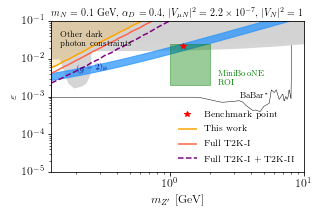

In [9]:
# for paper
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
mz_epsilon_heavy_plot(ax, retrieved['FHC']['pars']['m4'], retrieved['FHC']['pars']['mz'])
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   save_name='final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   linestyles=['-', '-', '--'])

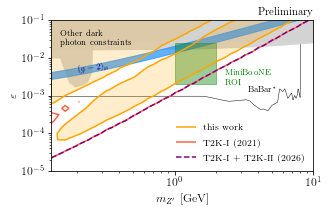

In [42]:
# for poster
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
mz_epsilon_heavy_plot(ax, retrieved['FHC']['pars']['m4'], retrieved['FHC']['pars']['mz'], poster_setting=True)
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   save_name='final_poster',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   poster_setting=True,
                   linestyles=['-', '-', '--'])

# Heavy $m_N - |U_{\mu N}|^2$

In [7]:
case_vars = ['m4', 'Umu4_2']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

tpc_argon_only FHC
tpc_argon_only RHC
tpc_pod_only FHC
tpc_pod_only RHC
tpc FHC
tpc RHC
tpc_projection1 FHC
tpc_projection1 RHC
tpc_projection2 FHC
tpc_projection2 RHC


In [8]:
likes['tpc_projection1_2'] = combine_likes([likes['tpc_projection1'], likes['tpc_projection2']])
likes['This work'] = likes['tpc']
likes['Full T2K-I'] = likes['tpc_projection1']
likes['Full T2K-I + T2K-II'] = likes['tpc_projection1_2']

In [9]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_argon_only', 'tpc_pod_only', 'tpc'],
                   hierarchy=hierarchy,
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy'],
                   linestyles=['-', '-', '-'])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


RuntimeError: latex was not able to process the following string:
b'tpc_argon_only'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode

(/n/home00/nfoppiani/.cache/matplotlib/tex.cache/180090a6b64c9eb5eed5c792f4b511
2b.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./180090a6b64c9eb5eed5c792f4b5112b.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily tpc_
                    argon_only}
No pages of output.
Transcript written on 180090a6b64c9eb5eed5c792f4b5112b.log.




RuntimeError: latex was not able to process the following string:
b'tpc_argon_only'

Here is the full report generated by latex:
This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode

(/n/home00/nfoppiani/.cache/matplotlib/tex.cache/180090a6b64c9eb5eed5c792f4b511
2b.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(./180090a6b64c9eb5eed5c792f4b5112b.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily tpc_
                    argon_only}
No pages of output.
Transcript written on 180090a6b64c9eb5eed5c792f4b5112b.log.




<Figure size 319.68x204.051 with 1 Axes>

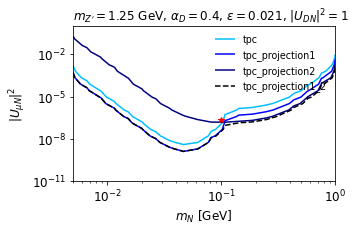

In [38]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1', 'tpc_projection2', 'tpc_projection1_2'],
                   hierarchy=hierarchy,
                   save_name='tpc_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', '-', '-', '--'])

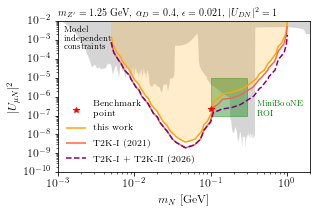

In [55]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
m4_Umu4_2_heavy_plot(ax, np.geomspace(1e-3, 2, 1000))
    
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   save_name='final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower left',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   linestyles=['-', '-', '--'])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


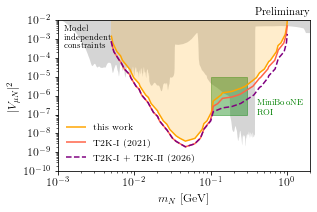

In [9]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
m4_Umu4_2_heavy_plot(ax, np.geomspace(1e-3, 2, 1000))

basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['This work', 'Full T2K-I', 'Full T2K-I + T2K-II'],
                   hierarchy=hierarchy,
                   save_name='final_poster',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower left',
                   colors=['orange', 'tomato', 'purple'],
                   fill=[True, False, False],
                   poster_setting=True,
                   linestyles=['-', '-', '--'])